In [1]:
from smartem.segmentation import segmenter, utils
from skimage import measure
from smartem.offline.train_mb_error_detector.NNtools import UNet
import cv2 as cv
import h5py
import matplotlib.pyplot as plt
import torch

In [2]:
model = UNet.UNet(1,2)

with h5py.File("/storage2/projects/smartEM/em-vis/smartem-data-test.hdf5", "r") as f:
    
    im = f['003_1_2/25/im'][()]
    mask = f['003_1_2/25/mask'][()]

print()
images = [im]


In [3]:
# example of how to use the segmenter
model_path = '/home/tommy-local/projects/smartem/SmartEM/pretrained_models/unet_50_1.29e-01.pth'
Iseg = segmenter.Segmenter(model_path, segmenter_function = measure.label, device=torch.device("cuda:1"))
Iseg.set_model(model_class=model)
labels = Iseg.get_labels(images[0])

Inverting the image as not using custom watershed function


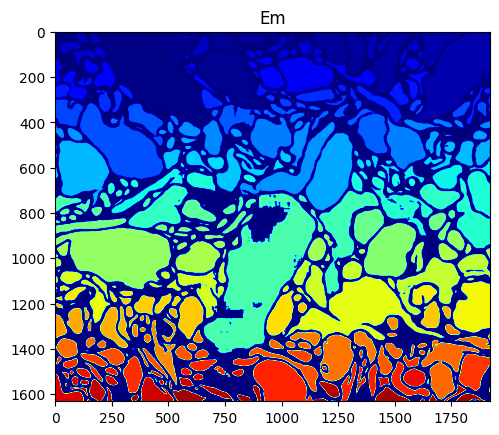

In [4]:
utils.visualize(EM_image = images[0], EM_label = labels)